<a href="https://colab.research.google.com/github/Switch-bot/TFPA-II/blob/main/Template_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import timeit #more accurate than time
import seaborn as sns
sns.set_style("white")
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Uploading files to Google Colabs
#Here we are importing .csv files to pandas DataFrames
#.csv files have 1 entry per line, with the different variables separated by
#commas. The first line always has the variable's name.
Signal = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/TFPAII/Signal.dat")
Background = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/TFPAII/Background.dat")

In [6]:
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
0,23.683732,0.480048,0.020269,0.038747,3.141593,0.440223,13.495369,0.496032,0.036756,10.192550,0.046218,0.004534,-2183.158805,-16.427563,100.520466,0.490079,0.502049,1,2
1,15.233516,0.312318,0.020502,0.060530,3.141593,3.166739,6.587557,0.096767,0.014689,8.652892,0.401987,0.046457,2402.601744,-127.806154,-153.439317,0.026002,0.503910,1,2
2,22.899094,0.740065,0.032319,0.040097,3.141593,1.055288,13.278357,0.344282,0.025928,9.625158,0.480154,0.049885,-377.038371,-84.374015,204.841736,0.007394,0.501278,1,2
3,46.479576,0.149461,0.003216,0.020366,3.141593,0.864948,16.512533,0.269458,0.016318,29.965198,0.122415,0.004085,1910.650721,-23.181467,-16.634724,0.041240,0.504455,1,2
4,53.773564,0.716948,0.013333,0.017578,3.141593,1.761021,35.114360,0.555726,0.015826,18.657626,0.290457,0.015568,-1634.603415,-62.860465,37.357997,0.784057,0.500881,1,2


In [ ]:
Signal.tail()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
1833,36.335406,0.740568,0.020381,0.026050,3.141593,0.977360,23.187484,0.333980,0.014403,13.151699,0.458347,0.034851,1719.051206,10.937353,-183.035629,0.027277,0.505067,1,2
1834,44.990499,0.080865,0.001797,0.017271,3.141593,0.604307,2.427337,0.036228,0.014925,42.576574,0.110877,0.002604,694.081845,-9.909704,-10.974272,0.454671,0.499446,1,2
1835,3.415932,0.022857,0.006691,0.335791,3.141593,2.671526,0.241154,0.072830,0.302008,3.187056,0.093036,0.029192,2486.327225,7.454543,63.562775,2.553039,0.497824,1,2
1836,86.255099,0.973193,0.011283,0.010650,3.141593,1.141819,35.423279,0.189040,0.005337,50.918734,0.794122,0.015596,-2407.005673,-49.973914,-24.242460,0.392921,0.502977,1,2
1837,15.477927,0.178191,0.011513,0.075773,3.141593,1.604163,1.853479,0.138420,0.074681,13.629137,0.120432,0.008836,-1996.982247,-46.992559,-35.422612,0.072946,0.500841,1,2


In [ ]:
#Printing a single collumn
print(Signal["Mother Total Momentum (GeV/c)"])

23.6837315393


In [ ]:
variable = "Mother Total Momentum (GeV/c)"
for entry, value in enumerate(Signal[variable]):
  print("Entry number " + str(entry))
  print(variable + ": " + str(value))
  if entry > 4.5-1: break

Entry number 0
Mother Total Momentum (GeV/c): 23.6837315393
Entry number 1
Mother Total Momentum (GeV/c): 15.2335155876
Entry number 2
Mother Total Momentum (GeV/c): 22.8990943251
Entry number 3
Mother Total Momentum (GeV/c): 46.4795764033
Entry number 4
Mother Total Momentum (GeV/c): 53.7735640934


In [ ]:
FullSignal = pandas.concat([Signal, Background], ignore_index=True)
print("Lenght of the Signal: " + str(len(Signal)))
print("Lenght of the Background: " + str(len(Background)))
print("Lenght of the concatenated dataset: " + str(len(FullSignal)))
#FullSignal.head()
FullSignal.tail()

Lenght of the Signal: 1838
Lenght of the Background: 6251
Lenght of the concatenated dataset: 8089


,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),...,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Daughter1 Fraction of Transverse Momentum,Daughter2 Fraction of Transverse Momentum,Event type
8084,16.002663,0.246935,0.015431,0.063151,3.141593,207.460257,15.452328,0.258548,NaN,0.315826,...,292.211101,-152.807485,149.483808,NaN,NaN,NaN,NaN,0.016732,0.050609,4.0
8085,4.782061,0.209208,0.043749,0.002933,3.141593,179.550486,2.577095,0.115937,NaN,2.198407,...,294.994162,-142.647263,-89.165961,NaN,NaN,NaN,NaN,0.044987,0.042245,4.0
8086,8.776259,0.250673,0.028563,0.006155,3.141593,161.521159,4.249984,0.118603,NaN,4.525891,...,-2017.466935,10.708790,-11.119188,NaN,NaN,NaN,NaN,0.027907,0.029492,4.0
8087,22.350196,0.918840,0.041111,0.015536,3.141593,254.339205,16.828812,0.690480,NaN,5.406403,...,-1557.463523,18.344480,21.590345,NaN,NaN,NaN,NaN,0.041030,0.044884,4.0
8088,105.542302,2.594059,0.024578,0.015875,3.141593,124.264853,99.717553,2.598376,NaN,0.852367,...,-1996.150628,4.659943,1.231290,NaN,NaN,NaN,NaN,0.026057,0.025645,4.0


In [ ]:
#Creating new columns with relevant information is as simple as "accessing" a
#previously non-existent column like "Decay" and setting its value
Signal['Decay'] = 1
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay
0,23.683732,0.480048,0.020269,0.038747,3.141593,0.440223,13.495369,0.496032,0.036756,10.192550,0.046218,0.004534,-2183.158805,-16.427563,100.520466,0.490079,0.502049,1,2,1
1,15.233516,0.312318,0.020502,0.060530,3.141593,3.166739,6.587557,0.096767,0.014689,8.652892,0.401987,0.046457,2402.601744,-127.806154,-153.439317,0.026002,0.503910,1,2,1
2,22.899094,0.740065,0.032319,0.040097,3.141593,1.055288,13.278357,0.344282,0.025928,9.625158,0.480154,0.049885,-377.038371,-84.374015,204.841736,0.007394,0.501278,1,2,1
3,46.479576,0.149461,0.003216,0.020366,3.141593,0.864948,16.512533,0.269458,0.016318,29.965198,0.122415,0.004085,1910.650721,-23.181467,-16.634724,0.041240,0.504455,1,2,1
4,53.773564,0.716948,0.013333,0.017578,3.141593,1.761021,35.114360,0.555726,0.015826,18.657626,0.290457,0.015568,-1634.603415,-62.860465,37.357997,0.784057,0.500881,1,2,1


In [ ]:
#If for some reason we wish to remove a column, we can use the 
#DataFrame::drop("column", inplace = True, axis = 1) method, where inplace=True 
#specifies that we want to alter the object itself, instead of creating a copy
#with the alterations, and axis=0 or 1 refers to line or column respectively
Signal.drop("Decay", inplace = True, axis = 1)
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
0,23.683732,0.480048,0.020269,0.038747,3.141593,0.440223,13.495369,0.496032,0.036756,10.192550,0.046218,0.004534,-2183.158805,-16.427563,100.520466,0.490079,0.502049,1,2
1,15.233516,0.312318,0.020502,0.060530,3.141593,3.166739,6.587557,0.096767,0.014689,8.652892,0.401987,0.046457,2402.601744,-127.806154,-153.439317,0.026002,0.503910,1,2
2,22.899094,0.740065,0.032319,0.040097,3.141593,1.055288,13.278357,0.344282,0.025928,9.625158,0.480154,0.049885,-377.038371,-84.374015,204.841736,0.007394,0.501278,1,2
3,46.479576,0.149461,0.003216,0.020366,3.141593,0.864948,16.512533,0.269458,0.016318,29.965198,0.122415,0.004085,1910.650721,-23.181467,-16.634724,0.041240,0.504455,1,2
4,53.773564,0.716948,0.013333,0.017578,3.141593,1.761021,35.114360,0.555726,0.015826,18.657626,0.290457,0.015568,-1634.603415,-62.860465,37.357997,0.784057,0.500881,1,2


In [ ]:
Signal["Decay Type"] = 1
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay Type
0,23.683732,0.480048,0.020269,0.038747,3.141593,0.440223,13.495369,0.496032,0.036756,10.192550,0.046218,0.004534,-2183.158805,-16.427563,100.520466,0.490079,0.502049,1,2,1
1,15.233516,0.312318,0.020502,0.060530,3.141593,3.166739,6.587557,0.096767,0.014689,8.652892,0.401987,0.046457,2402.601744,-127.806154,-153.439317,0.026002,0.503910,1,2,1
2,22.899094,0.740065,0.032319,0.040097,3.141593,1.055288,13.278357,0.344282,0.025928,9.625158,0.480154,0.049885,-377.038371,-84.374015,204.841736,0.007394,0.501278,1,2,1
3,46.479576,0.149461,0.003216,0.020366,3.141593,0.864948,16.512533,0.269458,0.016318,29.965198,0.122415,0.004085,1910.650721,-23.181467,-16.634724,0.041240,0.504455,1,2,1
4,53.773564,0.716948,0.013333,0.017578,3.141593,1.761021,35.114360,0.555726,0.015826,18.657626,0.290457,0.015568,-1634.603415,-62.860465,37.357997,0.784057,0.500881,1,2,1


In [ ]:
#Pandas allows us to perform bulk cuts on DataFrames in a somewhat easy fashion
SmallIP = Signal[Signal[" Impact Parameter (cm)"] <= 2]
print(len(Signal))
print(len(SmallIP))
SmallIP.head()

1838
1464


,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay Type
0,23.683732,0.480048,0.020269,0.038747,3.141593,0.440223,13.495369,0.496032,0.036756,10.192550,0.046218,0.004534,-2183.158805,-16.427563,100.520466,0.490079,0.502049,1,2,1
2,22.899094,0.740065,0.032319,0.040097,3.141593,1.055288,13.278357,0.344282,0.025928,9.625158,0.480154,0.049885,-377.038371,-84.374015,204.841736,0.007394,0.501278,1,2,1
3,46.479576,0.149461,0.003216,0.020366,3.141593,0.864948,16.512533,0.269458,0.016318,29.965198,0.122415,0.004085,1910.650721,-23.181467,-16.634724,0.041240,0.504455,1,2,1
4,53.773564,0.716948,0.013333,0.017578,3.141593,1.761021,35.114360,0.555726,0.015826,18.657626,0.290457,0.015568,-1634.603415,-62.860465,37.357997,0.784057,0.500881,1,2,1
6,59.808735,1.212093,0.020266,0.015074,3.141593,1.648633,33.848672,0.565670,0.016712,25.941439,0.691801,0.026668,-2258.041664,16.285888,-100.917947,0.600467,0.496780,1,2,1


In [ ]:
#We can also perform more complex cuts using AND and OR operators
#This may not be enough to perform every cut that we might want but is still helpful
NewSignal = Signal[(Signal[" Impact Parameter (cm)"] < 3.) & (Signal[" Decay Z (cm)"] > -2000.)]
NewSignal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Decay Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay Type
2,22.899094,0.740065,0.032319,0.040097,3.141593,1.055288,13.278357,0.344282,0.025928,9.625158,0.480154,0.049885,-377.038371,-84.374015,204.841736,0.007394,0.501278,1,2,1
3,46.479576,0.149461,0.003216,0.020366,3.141593,0.864948,16.512533,0.269458,0.016318,29.965198,0.122415,0.004085,1910.650721,-23.181467,-16.634724,0.041240,0.504455,1,2,1
4,53.773564,0.716948,0.013333,0.017578,3.141593,1.761021,35.114360,0.555726,0.015826,18.657626,0.290457,0.015568,-1634.603415,-62.860465,37.357997,0.784057,0.500881,1,2,1
5,13.094608,0.126747,0.009679,0.070516,3.141593,2.194283,5.325918,0.185026,0.034741,7.776573,0.285880,0.036762,-1898.745295,-20.888653,-48.774093,0.685148,0.501723,1,2,1
9,30.668322,0.185081,0.006035,0.030340,3.141593,1.816205,19.166546,0.239201,0.012480,11.524402,0.234216,0.020323,101.504041,-7.431870,43.749155,0.442120,0.500286,1,2,1


Text(0, 0.5, ' Impact Parameter (cm)')

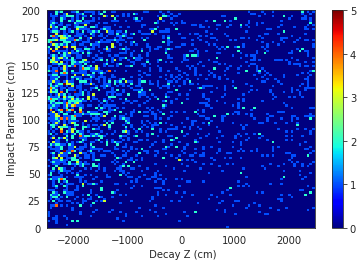

In [ ]:
#In this case we will be plotting a 2D histogram with the number of events as a
#function of both the Decay Position of our HNL along the Decay Vessel and the
#Impact Parameter

#We start by defining the variables that we want to plot for ease of copy of
#this code to other variables
Labels = [' Decay Z (cm)', ' Impact Parameter (cm)']

#In order to plot something with matplotlib we need to define a figure and
#create arrays with data to use as inputs
plt.figure(1)
datax = []
for x in Background[Labels[0]]:
    datax.append(x)
    
datay = []
for mom1 in Background[Labels[1]]:
    datay.append(mom1)

#Here we create our histograms by defining the data for the x axis, y axis, the
#number of bins, the style of the histogram and the range of our axes
#Notice that defining the binning as a single value makes it so both axes have
#the same number of bins   
plt.hist2d(datax, datay, bins=100, cmap=plt.cm.jet, range = [[-2500,2500],[0,200]])
plt.colorbar()
plt.xlabel(Labels[0])
plt.ylabel(Labels[1])

#We can save our plot by using matplotlib::savefig("path")
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/TFPAII/Background.jpg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


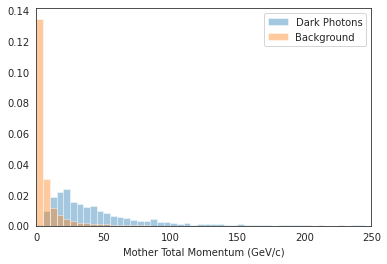

In [ ]:
#Overlapping distributions can be done with Seaborn
#This is simple to do since seaborn takes full pandas::dataframe columns as
#input, and automatically overlaps distributions just by adding two different
#datasets to the same object, as seen below

FullData = pandas.concat([Signal, Background], ignore_index=True)

x = Signal["Mother Total Momentum (GeV/c)"]
y = Background["Mother Total Momentum (GeV/c)"]

ax = sns.distplot(x, hist_kws={"range": [0,250]}, norm_hist = True, kde=False, label = "Dark Photons")#, fit=stats.gamma);
ax = sns.distplot(y, hist_kws={"range": [0,250]}, norm_hist = True, kde=False, label = "Background")#, fit=stats.gamma);
ax.set_xlim(0, 250)
plt.legend()

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/TFPAII/Background.jpg')

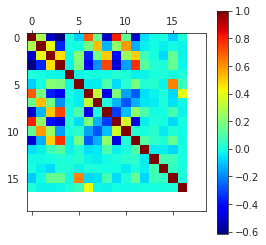

In [ ]:
#Simple way of plotting the correlation matrix with pandas
Signal.corr()
fig = plt.matshow(Signal.corr(), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [ ]:
#Using SKLearn pipelines in order to normalize all data to an average value of 0
#with a standard deviation of 1
#This block creates a pipeline that defines this specific normalizer

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

normIn = True #True #Whether we want to normalise and standardise the inputs
pca = True #True #Whether we want to use principal-component analysis to decorrelate inputs
whiten = True #True #Whether we want to whiten input data

stepsIn = []
if not normIn and not pca:
    stepsIn.append(('ident', StandardScaler(with_mean=False, with_std=False))) #For compatability
else:
    if normIn:
        stepsIn.append(('normIn', StandardScaler()))
    if pca:
        stepsIn.append(('pca', PCA(whiten=whiten)))
inputPipe = Pipeline(stepsIn)
stepsOut = []
print(stepsIn)

[('normIn', StandardScaler()), ('pca', PCA(whiten=True))]


In [ ]:
#Let us define the variables that we want to normalize
#The columns in the file are separated by ", " so since this reads it as a .csv
#file the spaces count in the names.
Features = [var for var in Signal.columns if str.startswith(var, " Event") or str.startswith(var, " Decay Angle") or str.startswith(var, "target") or str.startswith(var, " Decay Mode") or str.startswith(var, " Decay X") or str.startswith(var, " Decay Y") or str.startswith(var,'signal_probability') or str.startswith(var, " Daughter1 Fraction") or str.startswith(var, " Daughter2 Fraction") or str.startswith(var, " Mother Transverse") or str.startswith(var, " Invariant Mass (GeV/c^2)") or str.startswith(var, " Good Reco")]
NotFeatures = []
for var in Signal.columns:
  if var not in Features: NotFeatures.append(var)

print(Features)
print(NotFeatures)

[' Mother Transverse Momentum (GeV/c)', ' Decay Angle (rad)', ' Decay X (cm)', ' Decay Y (cm)', ' Invariant Mass (GeV/c^2)', ' Good Reco', ' Event Type']
['Mother Total Momentum (GeV/c)', ' Mother Fraction of Transverse Momentum', ' Opening Angle (rad)', ' Impact Parameter (cm)', ' Daughter1 Total Momentum (GeV/c)', ' Daughter1 Transverse Momentum (GeV/c)', '  Daughter1 Fraction of Transverse Momentum', ' Daughter2 Total Momentum (GeV/c)', ' Daughter2 Transverse Momentum (GeV/c)', '  Daughter2 Fraction of Transverse Momentum', ' Decay Z (cm)', ' DOCA (cm)']


In [ ]:
#Here we feed the normalizer the data.
#Be carefull because the normalization is dependent on the events fed to it
#So you should always normalize the full dataset first, and then divide it

SelectedSignal = Signal.drop(columns=Features, inplace = False)
X_class_train = inputPipe.fit_transform(SelectedSignal.values.astype('float32')) #This is a numpy array

#We can transform it into a pandas dataframe for confort
normalizedFeatures = []
for var in Signal.columns:
    if var not in Features:
        normalizedFeatures.append(var[:var.find("(")])
for i, var in enumerate(normalizedFeatures):
    if str.startswith(var, ' Mother Fraction'):
        normalizedFeatures[i] = normalizedFeatures[i] + "m"

#Be carefull because due to our PCA these labels do not correspond necessarily
#to the features that we have, and are just placeholders.
#The values actually correspond to projections of our original dataset into a
#space where the each component is as independent of each other as possible,
#while trying to maximize the variance for each 
X_train_df = pandas.DataFrame(X_class_train, columns=normalizedFeatures)
X_train_df.head()

,Mother Total Momentum,Mother Fraction of Transverse Momentum,Opening Angle,Impact Parameter,Daughter1 Total Momentum,Daughter1 Transverse Momentum,Daughter1 Fraction of Transverse Momentu,Daughter2 Total Momentum,Daughter2 Transverse Momentum,Daughter2 Fraction of Transverse Momentu,Decay Z,DOCA
0,0.278008,-1.001991,0.955357,0.175682,-1.962862,-1.025680,0.020687,-0.195038,0.435168,-1.168845,0.184477,-1.763205
1,0.828780,0.298001,-0.881515,0.218402,1.309038,1.059070,-0.894133,0.074164,0.067097,-0.698346,-0.117879,-1.730506
2,0.826474,0.179496,-0.239952,1.742742,-0.893266,1.167125,-0.342367,-0.069498,0.055104,-1.283630,0.053143,1.754863
3,-0.505375,-0.459071,-0.048577,-0.757899,1.112702,-0.903318,-0.908296,-0.446316,0.259217,0.154039,0.311663,-0.145312
4,-0.455612,-0.439263,0.942886,0.757471,-1.402467,0.224848,-0.134596,-0.302209,0.215804,0.863210,0.066106,0.131647


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


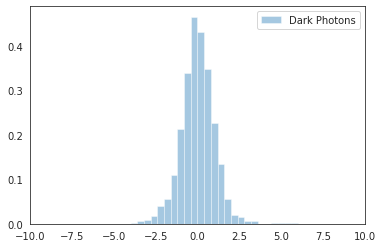

In [ ]:
#Plotting our newly standardized data, through the numpy array
x = []
for entry in X_class_train:
  x.append(entry[0])

ax = sns.distplot(x, hist_kws={"range": [-10, 10]}, norm_hist = True, kde=False, label = "Dark Photons")#, fit=stats.gamma);
ax.set_xlim(-10, 10)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


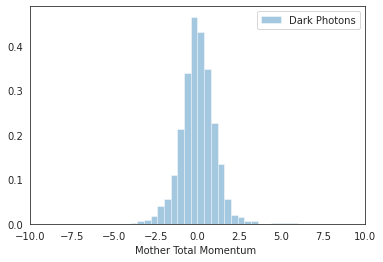

In [ ]:
x = X_train_df["Mother Total Momentum "]
ax = sns.distplot(x, hist_kws={"range": [-10, 10]}, norm_hist = True, kde=False, label = "Dark Photons")#, fit=stats.gamma);
ax.set_xlim(-10, 10)
plt.legend()